<a href="https://colab.research.google.com/github/mrcuny/Data-608/blob/main/Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mohammed Rahman**


---


**Story - 1 : Infrastructure Investment & Jobs Act Funding Allocation**

In [ ]:
%%capture

!pip3 install pandas numpy matplotlib

In [ ]:
!ls

sample_data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



us_pop_by_state = pd.read_csv('us_pop_by_state.csv')
us_pop_by_state.head(12)

,rank,State,state_code,2020_census,percent_of_total
0,1.0,California,CA,39538223,0.1191
1,2.0,Texas,TX,29145505,0.0874
2,3.0,Florida,FL,21538187,0.0647
3,4.0,New York,NY,20201249,0.0586
4,5.0,Pennsylvania,PA,13002700,0.0386
5,6.0,Illinois,IL,12801989,0.0382
6,7.0,Ohio,OH,11799448,0.0352
7,8.0,Georgia,GA,10711908,0.0320
8,9.0,North Carolina,NC,10439388,0.0316
9,10.0,Michigan,MI,10077331,0.0301


In [ ]:
state_dict = dict(zip(us_pop_by_state['State'].str.lower(), us_pop_by_state['state_code'].str.upper()))
state_dict['District of Columbia'.lower()] = 'DC'
state_dict['DELEWARE'.lower()] = 'DE'


In [ ]:
voting = pd.read_csv('voting.csv')
voting.head(8)

,State,state_abr,trump_pct,biden_pct,trump_vote,biden_vote,trump_win,biden_win
0,Alaska,AK,53.1,43.0,189543,153502,1,0
1,Hawaii,HI,34.3,63.7,196864,366130,0,1
2,Washington,WA,39.0,58.4,1584651,2369612,0,1
3,Oregon,OR,40.7,56.9,958448,1340383,0,1
4,California,CA,34.3,63.5,5982194,11082293,0,1
5,Idaho,ID,63.9,33.1,554128,287031,1,0
6,Montana,MT,56.9,40.6,343647,244836,1,0
7,Nevada,NV,47.7,50.1,669890,703486,0,1


In [ ]:
# state_dict = dict(zip(voting['state'].str.lower(), voting['state_abr'].str.upper()))


In [ ]:
allocation = pd.read_csv('allocation.csv')
allocation.head(4)

,State,Total (Billions)
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000


In [ ]:
allocation['state_code'] = allocation['State'].str.lower().map(state_dict)

allocation.dropna(inplace=True)
allocation.head(6)


,State,Total (Billions),state_code
0,ALABAMA,3.0,AL
1,ALASKA,3.7,AK
3,ARIZONA,3.5,AZ
4,ARKANSAS,2.8,AR
5,CALIFORNIA,18.4,CA
6,COLORADO,3.2,CO


In [ ]:
allocation_extended = allocation.merge(us_pop_by_state.loc[:, ['state_code', '2020_census', 'percent_of_total']], left_on='state_code', right_on='state_code', how='inner')

allocation_extended['unit_allocation'] = allocation_extended['Total (Billions)'] \
    / allocation_extended['2020_census']
allocation_extended.sort_values(by='unit_allocation', inplace=True)
allocation_extended.head(20)

,State,Total (Billions),state_code,2020_census,percent_of_total,unit_allocation
9,FLORIDA,8.2000,FL,21538187,0.0647,3.807191e-07
33,NORTH CAROLINA,4.5000,NC,10439388,0.0316,4.310598e-07
20,MARYLAND,2.7000,MD,6177224,0.0185,4.370895e-07
40,SOUTH CAROLINA,2.3000,SC,5118425,0.0155,4.493570e-07
4,CALIFORNIA,18.4000,CA,39538223,0.1191,4.653725e-07
10,GEORGIA,5.0000,GA,10711908,0.0320,4.667703e-07
23,MINNESOTA,2.7000,MN,5706494,0.0170,4.731452e-07
49,WISCONSIN,2.8000,WI,5893718,0.0175,4.750821e-07
43,TEXAS,14.2000,TX,29145505,0.0874,4.872106e-07
2,ARIZONA,3.5000,AZ,7151502,0.0219,4.894077e-07


In [ ]:
allocation_extended.tail(15)

,State,Total (Billions),state_code,2020_census,percent_of_total,unit_allocation
7,DELEWARE,0.7920,DE,989948,0.0029,8.000420e-07
19,MAINE,1.1000,ME,1362359,0.0041,8.074230e-07
17,KENTUCKY,3.9000,KY,4505836,0.0135,8.655442e-07
18,LOUISIANA,4.3000,LA,4657757,0.0140,9.231911e-07
3,ARKANSAS,2.8000,AR,3011524,0.0091,9.297618e-07
39,RHODE ISLAND,1.1000,RI,1097379,0.0032,1.002388e-06
48,WEST VIRGINIA,2.0000,WV,1793716,0.0054,1.115004e-06
31,NEW MEXICO,2.6000,NM,2117522,0.0063,1.227850e-06
45,VERMONT,0.8521,VT,643077,0.0019,1.325036e-06
41,SOUTH DAKOTA,1.3000,SD,886667,0.0027,1.466165e-06


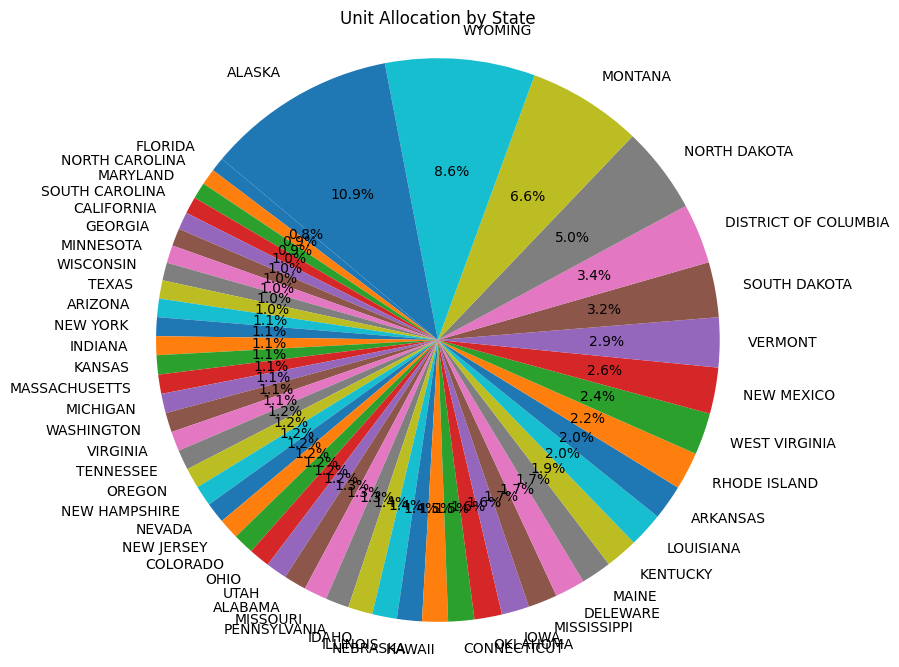

In [ ]:
plt.figure(figsize=(8, 8))  # Set the figure size (optional)

# Extract 'State' and 'unit_allocation' columns
states = allocation_extended['State']
allocations = allocation_extended['unit_allocation']

plt.pie(allocations, labels=states, autopct='%1.1f%%', startangle=140) # Create the pie chart

plt.title('Unit Allocation by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?<br>

To determine whether the allocation is equitable based on the population of each state and territory, you need to compare the unit allocation values: the ration between allocation and population. Meaning If the allocation values are proportional to the population, and the proportion rate is the same, it can be considered equitable. If there are significant disparities, it may indicate bias.

Previous pie chart states that there is a bias pro cold weather like Alaska, Montana, and North Dakota; while hot weather like Florida or California has less allocation!

In [ ]:
voting.head()

,State,state_abr,trump_pct,biden_pct,trump_vote,biden_vote,trump_win,biden_win
0,Alaska,AK,53.1,43.0,189543,153502,1,0
1,Hawaii,HI,34.3,63.7,196864,366130,0,1
2,Washington,WA,39.0,58.4,1584651,2369612,0,1
3,Oregon,OR,40.7,56.9,958448,1340383,0,1
4,California,CA,34.3,63.5,5982194,11082293,0,1


In [ ]:
allocation_extended.shape, voting.shape

((51, 6), (51, 8))

In [ ]:
allocation_extended1 = allocation_extended.merge(
    voting.loc[:, ['state_abr', 'trump_win', 'biden_win', 'trump_pct', 'biden_pct']], left_on='state_code', right_on='state_abr', how='inner')
allocation_extended.head(5)

,State,Total (Billions),state_code,2020_census,percent_of_total,unit_allocation
9,FLORIDA,8.2,FL,21538187,0.0647,3.807191e-07
33,NORTH CAROLINA,4.5,NC,10439388,0.0316,4.310598e-07
20,MARYLAND,2.7,MD,6177224,0.0185,4.370895e-07
40,SOUTH CAROLINA,2.3,SC,5118425,0.0155,4.493570e-07
4,CALIFORNIA,18.4,CA,39538223,0.1191,4.653725e-07


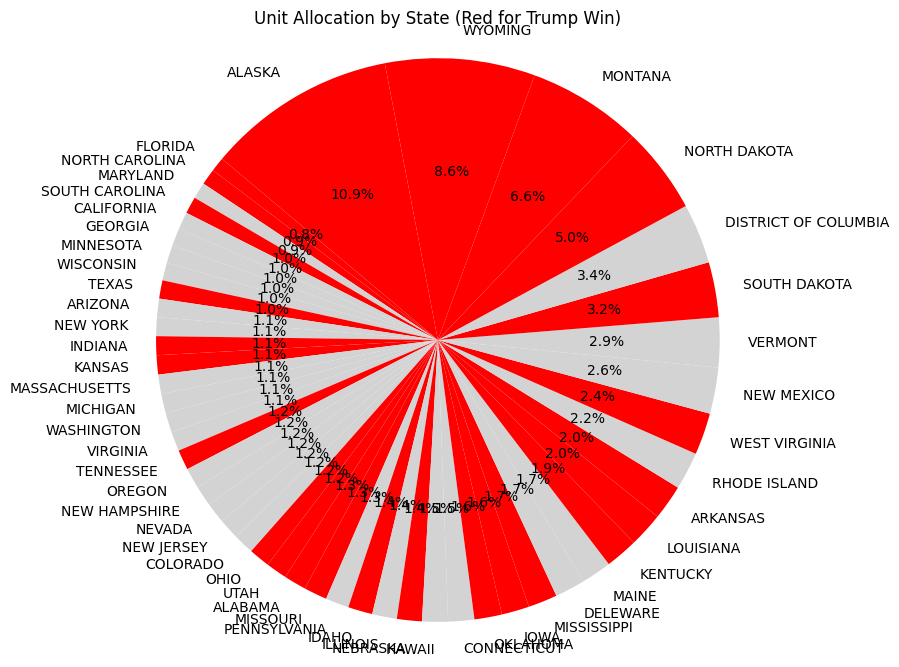

In [ ]:
plt.figure(figsize=(8, 8))  # Set the figure size (optional)

states = allocation_extended1['State']
allocations = allocation_extended1['unit_allocation']
trump_win = allocation_extended1['trump_win']

colors = ['red' if win == 1 else 'lightgray' for win in trump_win]

# Create the pie chart with specified colors
plt.pie(allocations, labels=states, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a title
plt.title('Unit Allocation by State (Red for Trump Win)')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Does the allocation favor the political interests of the Biden administration?<br>

Previous pie chart states that Trump wins in states/regions with high allocation!.

Another way to show the same, is the math calc of how many allocation represent the persons who vote Trump? And Biden?


In [ ]:
allocation_extended1.head()

,State,Total (Billions),state_code,2020_census,percent_of_total,unit_allocation,state_abr,trump_win,biden_win,trump_pct,biden_pct
0,FLORIDA,8.2,FL,21538187,0.0647,3.807191e-07,FL,1,0,51.2,47.9
1,NORTH CAROLINA,4.5,NC,10439388,0.0316,4.310598e-07,NC,1,0,50.1,48.7
2,MARYLAND,2.7,MD,6177224,0.0185,4.370895e-07,MD,0,1,32.4,65.8
3,SOUTH CAROLINA,2.3,SC,5118425,0.0155,4.493570e-07,SC,1,0,55.1,43.4
4,CALIFORNIA,18.4,CA,39538223,0.1191,4.653725e-07,CA,0,1,34.3,63.5


In [ ]:
trump_allocation = (allocation_extended1['trump_pct'].values * allocation_extended1['Total (Billions)'].values/100.0).sum()
print(f'Trump Allocation={trump_allocation}')

biden_allocation = (allocation_extended1['biden_pct'] * allocation_extended1['Total (Billions)']/100.0).sum()
print(f'Biden Allocation = {biden_allocation}')


Trump Allocation=92.5204318
Biden Allocation = 95.60609259999998


Meaning that despite that Trump did not win (less votes), the allocation that represent the voter has the same magnitud that Biden ones.

In [ ]:
from google.colab import files
uploaded = files.upload()